In [1]:
# Import any needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

###Back-of-the-envelope calculations for δ13C concentration in:
### Atmosphere, Biosphere, and *Ocean*
δ13C fluctuates in the Earth system as an indicator of the biosphere’s CO2 photosynthesis and respiration process. I expect to observe the same CO2 El Niño pattern in the δ13C fluctuation, which repeat in annual and interannual cycles. The general expected trend is to lower the atmospheric value of δ13C.

As a beginning, here is a back-of-envelope modeling of the system.





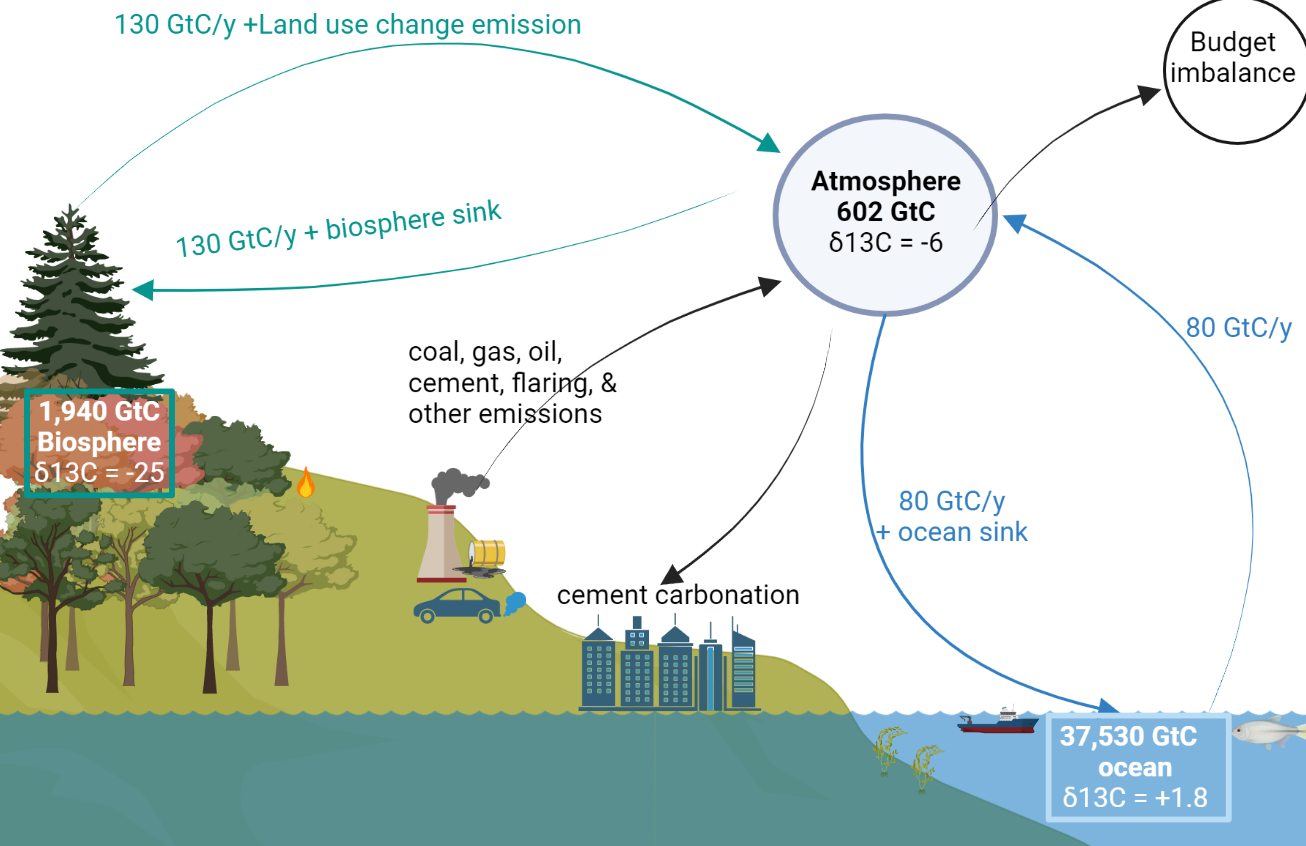


The sketch above is a simplified version of the Global Carbon Budget 2022 paper Friedlingstein et al. 2022. I will use their estimation for the reservoirs & fluxes. In the next code line I will import their data from 1850 till 2021


In [2]:
df = pd.read_csv('carbonbudgetfrom1850.csv',index_col='year')
time= df.index
df.columns

Index(['all_6_emissions_excluding_land_use_Change_emsissions', 'coal_emission',
       'oil_emission', 'gas_emission', 'cement_emission', 'flaring_emission',
       'other_emission', 'land_use_change_emission', 'atmospheric_growth',
       'ocean_sink', 'land_sink', 'cement_carbonation_sink',
       'budget_imbalance'],
      dtype='object')

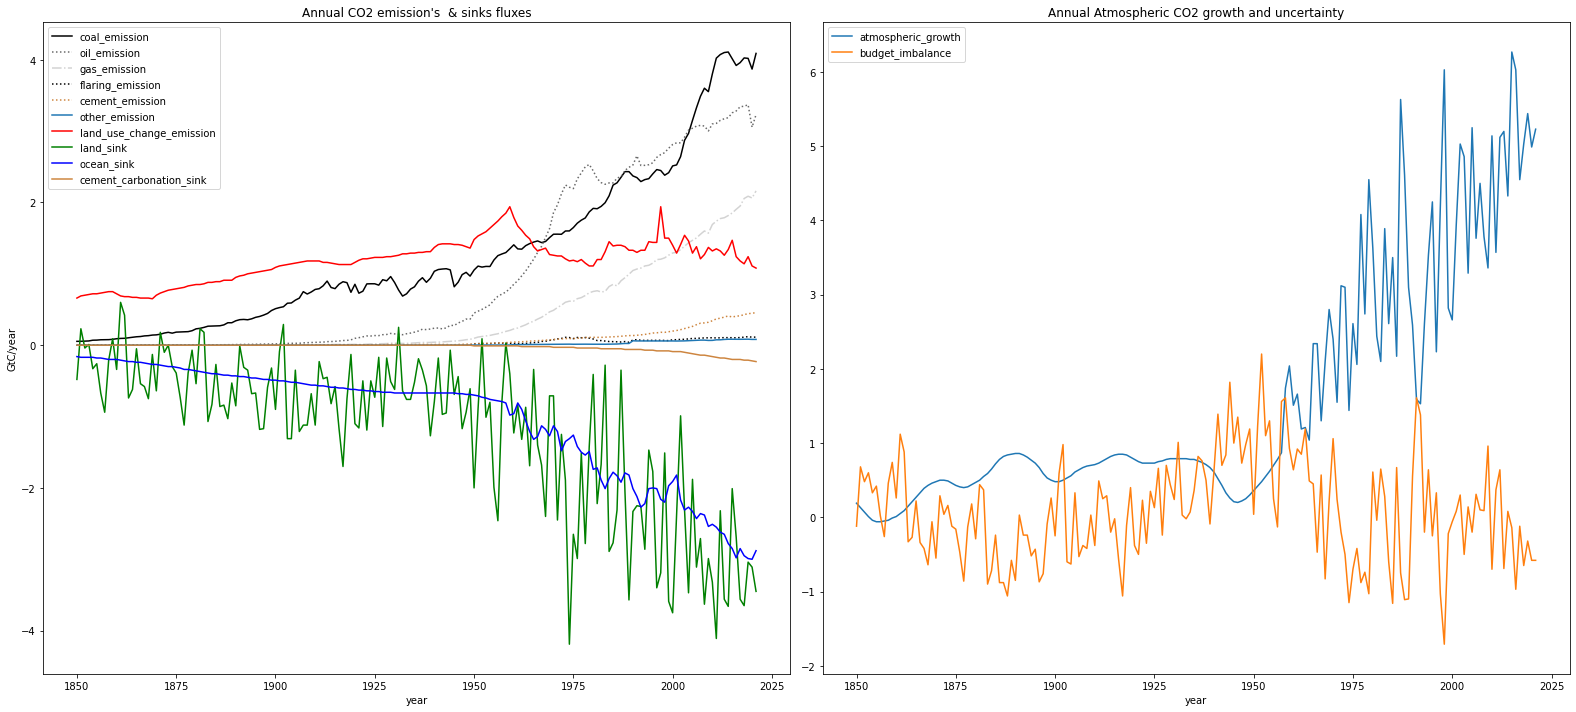

,all_6_emissions_excluding_land_use_Change_emsissions,coal_emission,oil_emission,gas_emission,cement_emission,flaring_emission,other_emission,land_use_change_emission,atmospheric_growth,ocean_sink,land_sink,cement_carbonation_sink,budget_imbalance
count,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,2.748882,1.268831,0.960757,0.403133,7.151119e-02,0.029283,0.015367,1.177674,1.589302,1.016744,1.213023,0.031047,0.076512
std,3.054918,1.119399,1.203052,0.604311,1.171714e-01,0.040000,0.026385,0.286818,1.633062,0.796047,1.111955,0.055736,0.693281
min,0.053738,0.053738,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.650000,-0.060000,0.160000,-0.600000,0.000000,-1.710000
25%,0.373167,0.359949,0.011322,0.002262,1.892500e-07,0.000000,0.000000,0.995000,0.500000,0.447500,0.397500,0.000000,-0.422500
50%,1.143882,0.897549,0.190764,0.032328,9.129356e-03,0.000000,0.000791,1.210000,0.780000,0.670000,0.845000,0.000000,0.035000
75%,5.162391,1.803743,2.274270,0.705516,1.080754e-01,0.064939,0.013584,1.362500,2.477500,1.510000,1.882500,0.040000,0.555000
max,10.132055,4.107946,3.369447,2.162071,4.564936e-01,0.119884,0.083690,1.940000,6.270000,3.000000,4.190000,0.230000,2.200000


In [3]:
# check what we have imported
# --------------Visual inspection--------------# 
fig, (ax1, ax2) = plt.subplots(1, 2)

#plotting the CO2 emission's  & sinks fluxes
# emissions
plt.subplot(1,2,1)
df.coal_emission.plot(figsize=(22, 10),color='black',linestyle='-')
df.oil_emission.plot(color='dimgrey',linestyle=':')
df.gas_emission.plot(color='lightgrey',linestyle='-.')
df.flaring_emission.plot(color='black',linestyle=':')
df.cement_emission.plot(color='peru', linestyle=':')
df.other_emission.plot()
df.land_use_change_emission.plot( color='r')
# sinks
(df.land_sink*-1).plot(color='g')
(df.ocean_sink*-1).plot(color='b')
(df.cement_carbonation_sink*-1).plot(color='peru')

plt.legend()
plt.xlabel("year")
plt.ylabel("GtC/year")
plt.title("Annual CO2 emission's  & sinks fluxes")



#plotting the atmospheric growth and uncertainty
df.atmospheric_growth.plot(figsize=(22, 10),ax=ax2)
df.budget_imbalance.plot(ax=ax2)
plt.legend()
ax2.set_title("Annual Atmospheric CO2 growth and uncertainty")
ax2.legend()
fig.tight_layout()
plt.show()

# --------------Statistical inspection--------------# 
df.describe()

In general,the fluxes have the d13C signature of its origin reservoir. Except three fluxes:

1- The flux from atmosphere to the biosphere because of the photosynthetic CO2 fixation **fractionation**. photosynthetis favor the lighter carbon isotope 12C which make the biosphere depleted in d13C (Brugnoli & Farquhar, 2000). The fractionation yields lower value in C3 vegetations like trees ~d13C=-25, than the fractionation in C4 vegetation like grasses and some crops ~ d13C=-13 (Ruddiman, W. F. ,2001). According to Battle et al (2000), the fractionation value is (-18 ‰). I will use this value of (-18 ‰) in the next code line as parameter (weighted_terrestrial_fractionation). In this model I will use the value of =(atmospherics value-**weighted_terrestrial_fractionation (-18 ‰)**) as a value of the flux from atmosphere to biosphere. This parameter could be adjusted later slightely if needed because others like Still et al. (2003) give this parameter a value of (−16.5‰). Still et al. (2003) took in their consideration an **assimilation-weighted** terrestrial discrimination against 13CO2 for both C3 and C4 photosynthesis paths. 

2- The flux from air to the ocean. Battle et al.(2000) calculated the ocean kinetic fractionation as (-2.0 ± 1.0‰). I will use this value of (-2) in the model as a  parameter **fractionation_from_atmosphere_to_ocean**. Battle et al.(2000) took this estimation originally from both both (Siegenthaler & Münnich,1981; Rik Wanninkhof,1985). Rik Wanninkhof (1985) wrote: "*The experimental results give a fractionation of-2.4 ± 2.0‰ while the calculated value for invasion is-2.1 ± 0.3‰ (i.e. 13CO2 invading slower), The results show that the fractionation of CO2 during invasion into a hydroxide solution (-14‰) is clearly too high as a value for invasion into seawater and should no longer be used as an upper limit in CO2 models.*

3- The flux from ocean to air. Siegenthaler & Münnich (1981) " considered a vlue of *-9.7 to -10.2%  for ocean-to-atmosphere transfer*". I will use a value of -10  in this model. Rik Wanninkhof (1985) mentioned a value of ( from -0.7 to +1.6) but it was not pretty clear in his paper if this number for theis flux.


In [4]:
weighted_terrestrial_fractionation = -16.5
fractionation_from_atmosphere_to_ocean = -2   # ocean kinetic fractionation
fractionation_from_ocean_to_atmosphere = -10

In [7]:
# let us establish the reservoirs & fluxes values:
# All units in  GtC/y for fluxes and  GtC for reservoirs
# All calculations for (C) carbon mass only. It is not for CO2

# -------------- Reservoirs size--------------#
# the initial size of C reservoir in ocean in the year 1850
# assume that the sum_of_DIC, marine biota, and OC = 37528 GtC
#ocean = np.array([37528]) # the real ocean size
ocean = np.array([3752.8]) # here I supposed that 10% of the ocean only affect the annual cycle

# the initial size of C reservoir in atmosphere
# assume 602 GtC in the year 1850
atmosphere = np.array([602])   

# the initial size of C reservoir in biosphere
# assume that the sum_of_soils and vegetation_Carbon is 2144 GtC
# Current:  vegeation + soils= 450+1700=2150 GtC according to the Golbal Carbon paper
#biosphere = np.array([2144])   
biosphere = np.array([444])     # here I will consider the vegetation only, without the soil

# --------------The fluxes--------------#
# biosphere fluxes
from_biosphere_to_Atmosphere = np.array(130 + df.land_use_change_emission)
from_Atmosphere_to_biosphere = np.array(130 + df.land_sink)
# ocean fluxes
from_ocean_to_Atmosphere = np.repeat(80, 172)   # we repeat the same flux in all the loop of 172 year
from_Atmosphere_to_ocean = np.array(80 + df.ocean_sink )  

#  fossil fuel fluxes
# Make numpy array from the columns to to facilitate the loop
# for emissions
coal_emission	= np.array(df.coal_emission)
gas_emission	= np.array(df.gas_emission)
oil_emission	= np.array(df.oil_emission)
cement_emission	= np.array(df.cement_emission)
flaring_emission	= np.array(df.flaring_emission)
other_emission	= np.array(df.other_emission)
# and for the carbonation_sink &  budget_imbalance
cement_carbonation_sink = np.array(df.cement_carbonation_sink)
budget_imbalance =    np.array(df.budget_imbalance)


# --------------There are other fluxes that mix with the atmospheric carbon--------------#
# I need to consider that there is another 13C signatures from biomass burning, and another from wetland and termite according to:
#  (page 14 of the  https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf)
# also the “geo-CH4” as in https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL033623

# -------------- δ13C values for the reservoirs--------------#
# help in the 3 needed values, more specifically in the ocean_13C

# all δ13C values in permill PDB Pee Dee Belemnite standard 
# δ13C of the three reservoirs of ocean, biosphere and atmosphere
atmosphere_13C = np.array([-6])   
biosphere_13C = np.array([-24.4]) # the biosphere value used the calculations of Still et al. 2003 that the simulated biomass values of C3 and C4 vegetation are 389.3 and 18.6 Pg C, respectively.
# which mean 95% of C3 and 5% for the C4
# assume that C3 value is -25 as in (Ruddiman, W. F. ,2001), and the value of the C4 is -13, then the result is
# -25*0.95-13*0.05 =-24.4 ‰ 


# The biosphere_13C value of -25 based on the last figure in https://gml.noaa.gov/ccgg/isotopes/c13tellsus.html

ocean_13C = np.array([1.8]) 
# The ocean_13C value must be (+1.8) according to figure 2 and 3 of http://dx.doi.org/10.1029/2001GB001817

# I assume that the d13C of DIC is representative for all ocean carbon is not correct?
# I made this assumption after considering that the DIC is 53 times bigger than the OC and biota, according to the carbon budget paper figure:
# 
# The ocean has OC and biota beside the DIC? Furthermore the riverine OC input.
# OC and marine biota have very low value according to figure 2 of the publication http://dx.doi.org/10.1016/j.earscirev.2005.10.003 
# I need to improve that and implement the value of each type of oceanic carbon. but how?

# Another point of consideration is the ocean needs thousands of years to mix so maybe I should limit the oceanic reservoir size to only the upper ocean?
# Rik Wanninkhof (1985) consider the value of 1.5 for the average surface ocean

# -------------- δ13C of the six fossil fluxes--------------#
# help in the 6 needed values
# NOAA website consider all fossil fuels as -28 in a simplification at 
# https://gml.noaa.gov/outreach/isotopes/c13tellsus.html

gas_13C  = -45.2
# It is very rough estimation because: for example for Gas there are three main types (conventional gas, shale gas, and coal gas) beside the extraction and the geological layer that difference
# The gas_13C value is an average of the natural gas/coal from:
# study database https://essd.copernicus.org/articles/14/4365/2022/essd-14-4365-2022.pdf    page 13, table5 
# I need to find the better value estimation of the fossil CH4 only

# whearas Sherwood et al, 2017 (page 7) calculated a mean value of -44.8 for gas (mean of all conventional, coal and shale gas), -61.7 gas from microbial sources, and -26.2 for biomass burning.
# But in figure 7 from Sherwood et al, 2017: The flux-weighted average of all sources produces a mean atmospheric δ13C CH4 of∼−53.6 ‰

coal_13C = -24.1
oil_13C  = -30
# The coal_13C and  oil_13C obtained from Andres et al. 1994, page 8. 
# https://www.osti.gov/servlets/purl/10185357
cement_13C = 0.3
# The cement_13C obtained from Andres et al. 1994, page 9. 
# https://www.osti.gov/servlets/purl/10185357
flaring_13C = gas_13C  # I suggest it is the same
other_13C = -26 # I assume that this is the same as trees. The value of -26 token from:
# https://gml.noaa.gov/outreach/isotopes/c13tellsus.html


# The next line is just to run experimental model without or with high value of fossil fuel
# gas_13C= coal_13C= oil_13C= cement_13C= flaring_13C= other_13C =-120

In [8]:
# A loop of 172 steps (years) will be made to estimate the change in the Carbon reservoirs size first 
for i in range(172):
  # every step will calculate the size change of all three reservoirs
  ocean = np.append(ocean, ocean[i] + from_Atmosphere_to_ocean[i] - from_ocean_to_Atmosphere[i] )
  atmosphere = np.append(atmosphere, atmosphere[i] - from_Atmosphere_to_ocean[i] + from_ocean_to_Atmosphere[i] +
                         from_biosphere_to_Atmosphere[i] - from_Atmosphere_to_biosphere[i] -
                         cement_carbonation_sink[i]- budget_imbalance[i]+
                          coal_emission[i]+ gas_emission[i]+ oil_emission[i]+ 
                         cement_emission[i]+ flaring_emission[i]+ other_emission[i]) 
  biosphere = np.append(biosphere, biosphere[i] - from_biosphere_to_Atmosphere[i] + from_Atmosphere_to_biosphere[i])


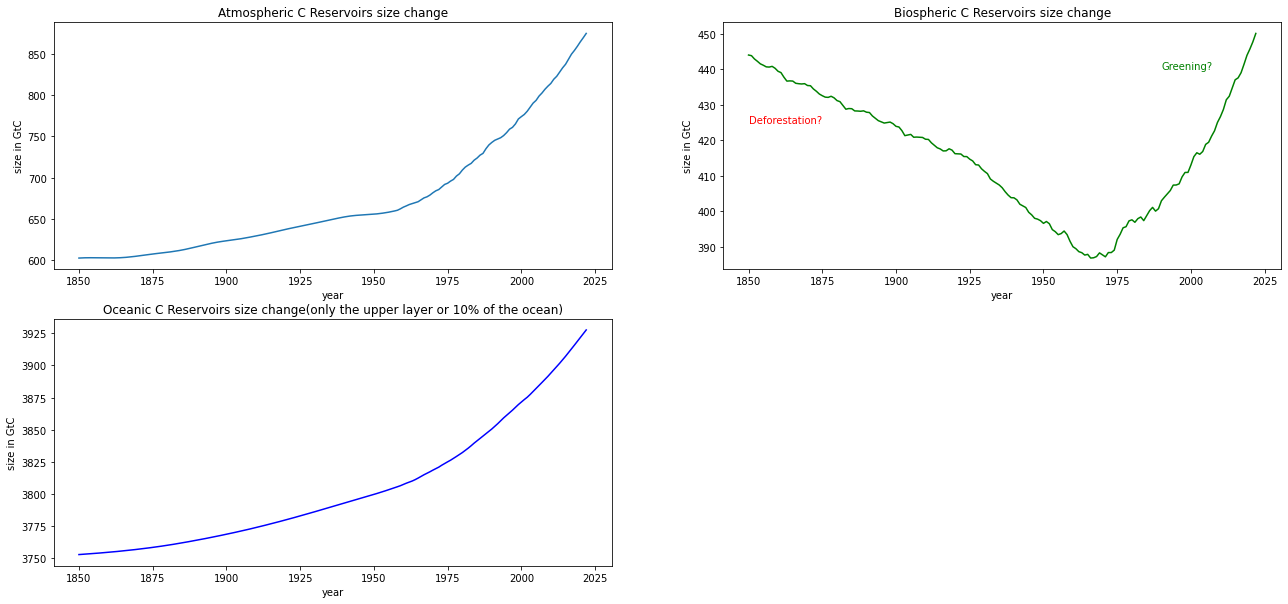

Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of  875 
 Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of  450 
Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 37,703 GtC. My model yields value of  3928


In [9]:
# tussen stapje ter controle
# Plot the change in these three reservoirs in time  
fig, axs = plt.subplots(2, 2,figsize=(22, 10))


# first add extra one year to the time array because we forecasted a year in the last code
while len(time)==172:  # Add the year '2022' if you didn't added yet
  time = np.append(time,2022)

axs[0, 0].plot(time, atmosphere, label='atmosphere',)
axs[0, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 0].set_title("Atmospheric C Reservoirs size change")

axs[0, 1].plot(time,biosphere, label='biosphere', color='g')
axs[0, 1].set(xlabel= "year", ylabel= "size in GtC")
axs[0, 1].set_title("Biospheric C Reservoirs size change")
axs[0, 1].text(1850,425, "Deforestation?", color='r')
axs[0, 1].text(1990,440, "Greening?", color='g')

axs[1, 0].plot(time,ocean, label='ocean',color='b')
axs[1, 0].set(xlabel= "year", ylabel= "size in GtC")
axs[1, 0].set_title("Oceanic C Reservoirs size change(only the upper layer or 10% of the ocean)")

axs[1, 1].remove()
plt.show()


# check the reservoirs size in 2021 according to my model and compare it with the carbon budget estimation
print('Atmospheric C Reservoirs size in the year 2021 according to the carbon budget paper is 875 GtC. My model yields value of ',round(atmosphere[-1]),
      '\n','Biosphere C Reservoirs size in the year 2021 according to the carbon budget paper is 450 GtC. My model yields value of ',round(biosphere[-1]), '\n'
      'Oceanic C Reservoirs size in the year 2021 according to the carbon budget paper is 37,703 GtC. My model yields value of ',round(ocean[-1]) )

The biosphere absorbs ~29**±8**% of our **ANNUAL** emission  **during the last decade** according to Keeling & Graven; 2021 (https://doi.org/10.1146/annurev-environ-012220-125406) 

However, the biosphere figure above, shows that this CO2 sink is just a restoration of the original reservoir size. We almost reached the 1850 reservoir capacity. Do we have any extra **capacity**? Can the biosphere accommodate more carbon without amplification of the wildfire risk? In the next lines I will try to answer this question in fast calculation


In [10]:
greening= round(biosphere.max()- biosphere.min())
greening_prec = round((greening/biosphere.min())*100)

print('The total greening of',np.where(biosphere== biosphere.max())[0]-np.where(biosphere== biosphere.min())[0] ,'years\
, from the seventies till today is ',greening,'GtC,\
 This is a', greening_prec, '% increase in capacity' )

The total greening of [56] years, from the seventies till today is  63 GtC, This is a 16 % increase in capacity


 3 % increase of vegetation must not be an alarming problem for the biosphere capacity if the increase spreaded over all the globe and not concentrated in some forest. If it is  spreaded all over the world that will be ~half kilo of carbon in every single square meter on the land even on Sahara and tundra.

Although the model shows an increas in the vegetaion. The worldbank data shows **decrease** 3.3% of the Forest area in the last thirty years
https://data.worldbank.org/indicator/AG.LND.FRST.ZS

Other sources like the 
https://ourworldindata.org/forest-area
Which is based on the UN and other papers, indicates that The forest area was bigger in 1850 than today. In the Crabon Budget paper and this model both are the same which is anti intuition. 

In [11]:
# back to the d13C

The balance equation for the atmosphere

δ13C X **new** atmosphere = (δ13C X **old** atmosphere)   +   (δ13C X fluxes)

With the **new** atmosphere I mean the atmosphere size in the next step

With **old** atmosphere I mean the atmosphere in the previous step


rearrange it

δ13C  = [(δ13C X old atmosphere)   +   (δ13C X flux)]    /  new  atmosphere




In [12]:
for i in range(172):
  atmosphere_13C = np.append(atmosphere_13C, (atmosphere[i]*atmosphere_13C[i] - 
                                              #the atmospher-ocean fluxes
                                              from_Atmosphere_to_ocean[i] * (atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean)  +\
                                              from_ocean_to_Atmosphere[i] * (ocean_13C[i]+fractionation_from_ocean_to_atmosphere) +\
                                               #the atmospher-biosphere fluxes
                                              from_biosphere_to_Atmosphere[i] * biosphere_13C[i] -\
                                              from_Atmosphere_to_biosphere[i] * (atmosphere_13C[i] + weighted_terrestrial_fractionation)  +\
                                               #other fluxes
                                              cement_carbonation_sink[i] *cement_13C- budget_imbalance[i]* atmosphere_13C[i]  +
                                               #the fossil fuel & cement emission fluxes
                                              coal_emission[i]*coal_13C+ gas_emission[i]*gas_13C+ oil_emission[i]*oil_13C+ 
                                              cement_emission[i]*cement_13C+ flaring_emission[i]*flaring_13C+ other_emission[i]*other_13C)/
                                              atmosphere[i+1] )

  biosphere_13C = np.append(biosphere_13C, (biosphere[i]* biosphere_13C[i] - 
                                            from_biosphere_to_Atmosphere[i] * biosphere_13C[i] + 
                                            from_Atmosphere_to_biosphere[i] *(atmosphere_13C[i] + weighted_terrestrial_fractionation) )/biosphere[i+1] )
  ocean_13C = np.append(ocean_13C,( ocean[i]* ocean_13C[i] +
                                   from_Atmosphere_to_ocean[i] *(atmosphere_13C[i]+fractionation_from_atmosphere_to_ocean) -
                                   from_ocean_to_Atmosphere[i] *(ocean_13C[i]+fractionation_from_ocean_to_atmosphere))/ocean[i+1])    
print('Last Atmosphere 13C value is ',atmosphere_13C[-1],'\n','Last Biosphere 13C value is  ',biosphere_13C[-1], '\n','Last Ocean 13C value is  ',ocean_13C[-1])             

Last Atmosphere 13C value is  -9.609414044806407 
 Last Biosphere 13C value is   -25.96431052853501 
 Last Ocean 13C value is   -0.2926872980258449


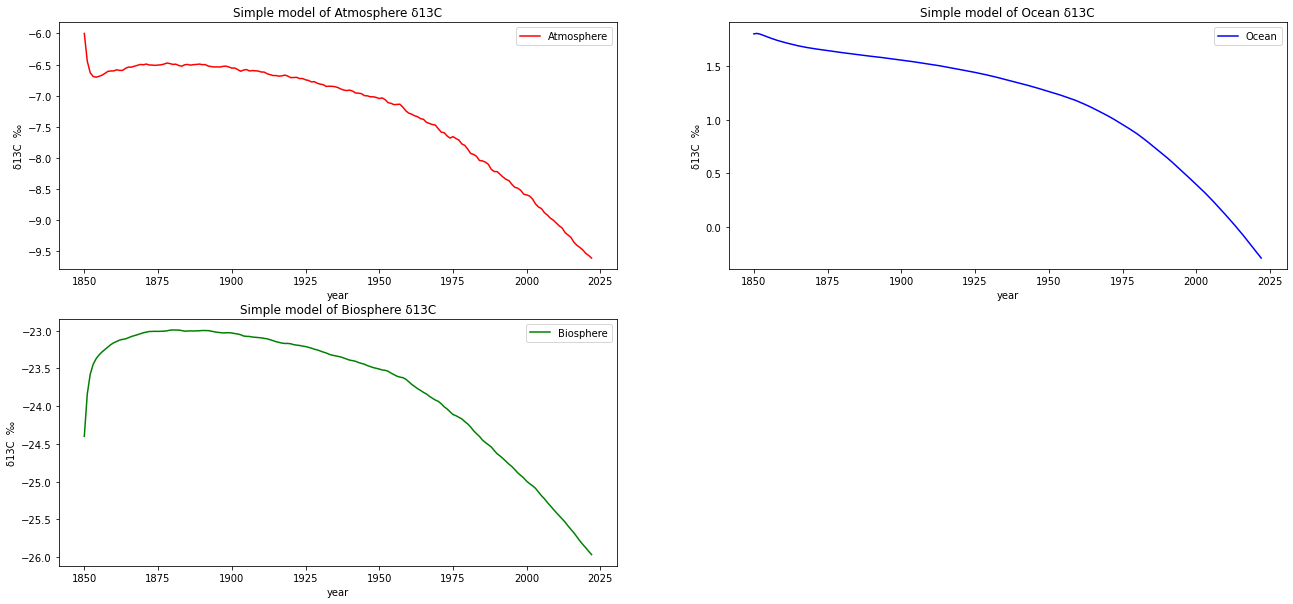

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time, atmosphere_13C, label='Atmosphere',color='r')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C")
axs[0, 0].legend()

axs[0, 1].plot(time,ocean_13C, label='Ocean',color='b')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C")
axs[0, 1].legend()

axs[1, 0].plot(time,biosphere_13C, label='Biosphere',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

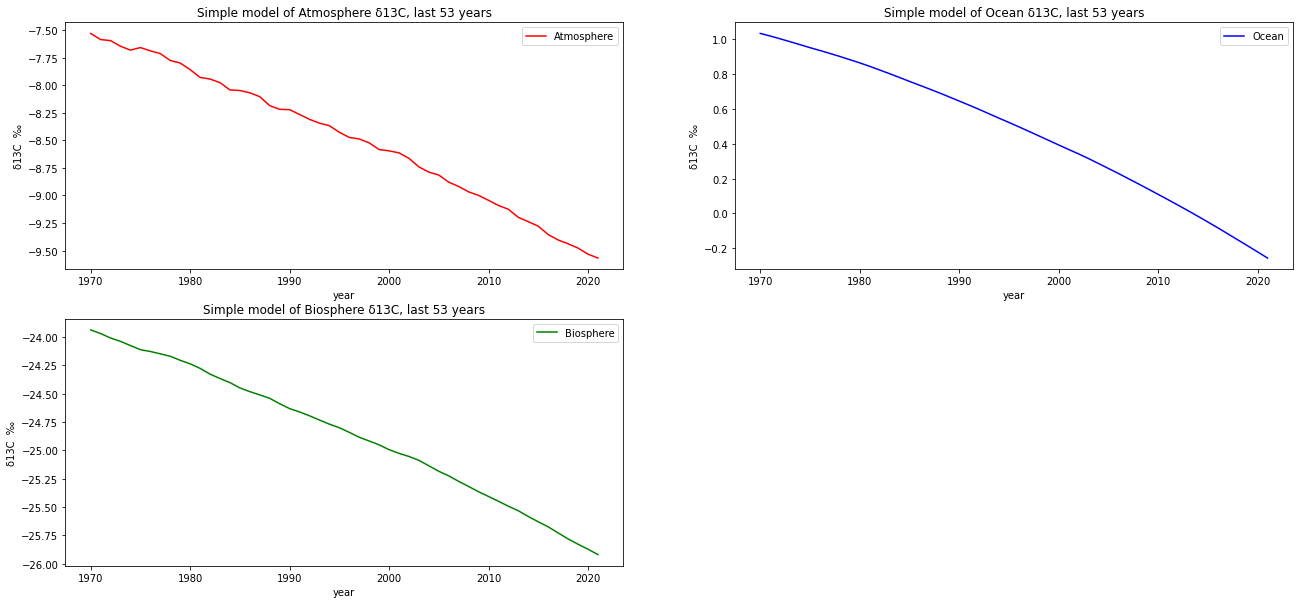

In [14]:
# zoom to the last 53 years
fig, axs = plt.subplots(2, 2,figsize=(22, 10))

axs[0, 0].plot(time[-53:-1], atmosphere_13C[-53:-1], label='Atmosphere',color='r')
axs[0, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 0].set_title("Simple model of Atmosphere δ13C, last 53 years")
axs[0, 0].legend()

axs[0, 1].plot(time[-53:-1],ocean_13C[-53:-1], label='Ocean',color='b')
axs[0, 1].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[0, 1].set_title("Simple model of Ocean δ13C, last 53 years")
axs[0, 1].legend()

axs[1, 0].plot(time[-53:-1],biosphere_13C[-53:-1], label='Biosphere',color='g')
axs[1, 0].set(xlabel= "year", ylabel= "δ13C  ‰")
axs[1, 0].set_title("Simple model of Biosphere δ13C, last 53 years")
axs[1, 0].legend()

axs[1, 1].remove()
plt.show()

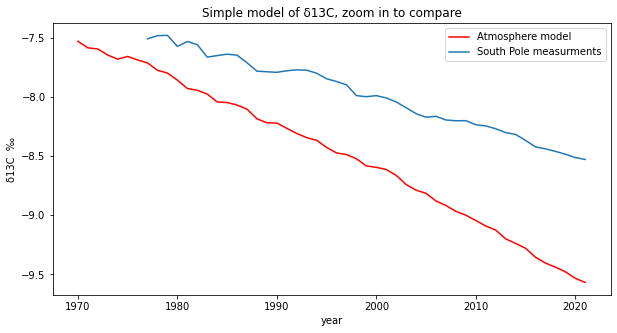

In [15]:
# Comparison with the south pole measurments from Scrippsco2 project
# Scrippsco2 data can be found at
# https://scrippsco2.ucsd.edu/
# https://scrippsco2.ucsd.edu/data/atmospheric_co2/sampling_stations.html

# Annual average from South Pole station 
spo_time= ([1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
spo_13C= ([-7.509166667,-7.4825,-7.48,-7.573333333,-7.531666667,-7.558333333,-7.664166667,-7.650833333,-7.639166667,-7.6475,-7.711666667,-7.7825,-7.7875,-7.7925,-7.779166667,-7.771666667,-7.774166667,-7.8,-7.846666667,-7.87,-7.898333333,-7.989166667,-7.998333333,-7.989166667,-8.009166667,-8.0425,-8.091666667,-8.141666667,-8.171666667,-8.164166667,-8.195,-8.201666667,-8.200833333,-8.235,-8.245,-8.269166667,-8.301666667,-8.316666667,-8.3675,-8.4225,-8.439166667,-8.46,-8.484166667,-8.5125,-8.528571429])

plt.figure(figsize=(10, 5))
plt.plot(time[-53:-1], atmosphere_13C[-53:-1], label='Atmosphere model',color='r')
plt.plot(spo_time, spo_13C, label='South Pole measurments')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C, zoom in to compare")


#plt.text(1968,-7.7, "same fluctuation?")

#plt.text(1981,-7.5, "^", color='r')
#plt.text(1981,-7.55, "^", color='b')

#plt.text(1985,-7.6, "^", color='r')
#plt.text(1985,-7.65, "^", color='b')

plt.legend()
plt.show()

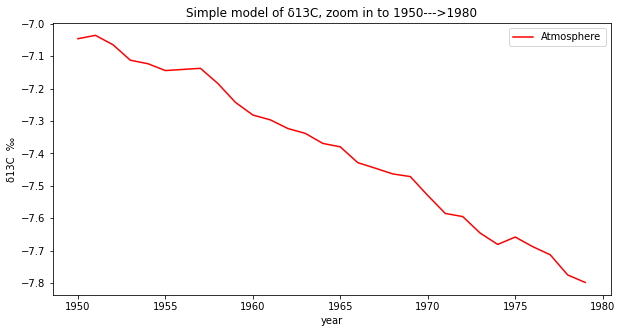

In [16]:
# Zoom in to the period when the land switch from source of C to a sink
# I will expect to see that in the d13C
# this is not visible because of the fossil fuel that mask the signal 

plt.figure(figsize=(10, 5))
plt.plot(time[100:130], atmosphere_13C[100:130], label='Atmosphere',color='r')
#plt.plot(time[100:130],biosphere_13C[100:130], label='Biosphere',color='g')
#plt.plot(time[100:130],ocean_13C[100:130], label='Ocean',color='b')
plt.xlabel("year")
plt.ylabel("δ13C  ‰")
plt.title("Simple model of δ13C, zoom in to 1950--->1980")
plt.legend()
plt.show()


**Discussion of Points  need to be improved in the model:**
* It will be a good idea to consider the change in the C3 and C4 vegeation in developing this model. The crops and the agriculture revolutions created anthropgenic landscape like the Corn Belt which is C4. Also the natural varability because the C4 plants vulnerablity for drought and El Niño in the tropics. 

* There are six process determine CO2 exchange between atmosphere and ocean 

1- Air invasion to the water

2- Air diffusion from water.

3- precipitations: rain water wash the CO2 from atmosphere and as a result the rain water is between 5.0 and 5.5

4- Evaporation: when water evaporate it lose its CO2 to the atmosphere

5- Biota (planktonic) intake and decay which exchange CO2 between atmosphere and surface water

6- Biota (benthos) intake and decay which exchange CO2 between DIC and organic carbon



In this code I accounted for the first two only? 

* Natural weathering absorbs roughly 1.1 billion tons CO2 sink according to:
 https://www.pik-potsdam.de/en/news/latest-news/enhanced-weathering-of-rocks-can-help-to-suck-co2-out-of-the-air-2013-a-little but this is not in the Global Carbon Budget
Moreover, The atmospheric CO2 concentration has increased and the mining activities increased as well. 
 I would expect that these increases results in more CO2 in the weathering/sink?

**References**

Battle, M., Bender, M. L., Tans, P. P., White, J. W. C., Ellis, J. T., Conway, T., & Francey, R. J. (2000). Global carbon sinks and their variability inferred from atmospheric O2 and δ13C. Science, 287(5462), 2467-2470. https://www.science.org/doi/abs/10.1126/science.287.5462.2467

Brugnoli, E., & Farquhar, G. D. (2000). Photosynthetic fractionation of carbon isotopes. Photosynthesis: physiology and metabolism, 399-434.  https://link.springer.com/chapter/10.1007/0-306-48137-5_17

Friedlingstein, P., O'sullivan, M., Jones, M. W., Andrew, R. M., Gregor, L., Hauck, J., ... & Zheng, B. (2022). Global carbon budget 2022. Earth System Science Data, 14(11), 4811-4900. https://essd.copernicus.org/articles/14/4811/2022/  https://essd.copernicus.org/articles/14/4811/2022/essd-14-4811-2022-f02-web.png 

Ruddiman, W. F. (2001). Earth's climate: past and future. Macmillan. figure 11-5
Still, C. J., Berry, J. A., Collatz, G. J., & DeFries, R. S. (2003). Global distribution of C3 and C4 vegetation: carbon cycle implications. Global biogeochemical cycles, 17(1), 6-1. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GB001807

Siegenthaler, U., & Münnich, K. O. (1981). 12C/13C fractionation during CO2 transfer from air to sea. Carbon Cycle Modeling. https://scope.dge.carnegiescience.edu/SCOPE_16/SCOPE_16_1.5.05_Siegenthaler_249-257.pdf

Wanninkhof, R. I. K. (1985). Kinetic fractionation of the carbon isotopes 13C and 12C during transfer of CO2 from air to seawater. Tellus B: Chemical and Physical Meteorology, 37(3), 128-135.
